Make sure that we have access to GPU

In [ ]:
!nvidia-smi

Install YOLOv8

In [4]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.111 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import display, Image

## Dataset

Install Roboflow, to download the dataset

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AbwRh2Gd1vOFEclXWlf7")
project = rf.workspace("epfl-nrex5").project("2d-object-detection-tsl")
dataset = project.version(25).download("yolov8")


/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=b1afaa07f9af25807ff0ef175f5c7224384c75300aa7e80943438698841f1828
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstall

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.111, to fix: `pip install ultralytics<=8.0.20`
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format

Extracting Dataset Version Zip to 2D-Object-Detection-tsl-25 in yolov8:: 100%|██████████| 24904/24904 [00:09<00:00, 2640.30it/s]


## Training

Train the YOLOv8 model on the augmented KITTI dataset, modify the epochs to 25 if you have a powerful GPU.

In [7]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=1280 plots=True optimizer='Adam' lr0=0.001

/content/drive/MyDrive/yolov8_augmented
100% 21.5M/21.5M [00:00<00:00, 131MB/s] 
Ultralytics YOLOv8.0.111 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/2D-Object-Detection-tsl-25/data.yaml, epochs=10, patience=50, batch=16, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, cla

Since the last command only train the model for 10 epochs because of the GPU limitation. Lunch this line for 15 more epochs with the model taking the latest weights saved after the last training.

In [ ]:

!yolo task=detect mode=train model=runs/detect/train/weights/best.pt data={dataset.location}/data.yaml epochs=15 imgsz=1280 plots=True optimizer='Adam' lr0=0.001

/content/drive/.shortcut-targets-by-id/1KDufcSOPeZ90N-qJe2OVAlOKNp7BsZky/yolov88_augmented
Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=runs/detect/train/weights/best.pt, data=/content/datasets/2D-Object-Detection-tsl-14/data.yaml, epochs=15, patience=50, batch=16, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augme

In [8]:
%cd /content/drive/MyDrive/yolov8_augmented
!ls runs/detect/train/

/content/drive/MyDrive/yolov8_augmented
args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1685557879.f00a8c2b4801.2867.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


/content/drive/MyDrive/yolov8_augmented


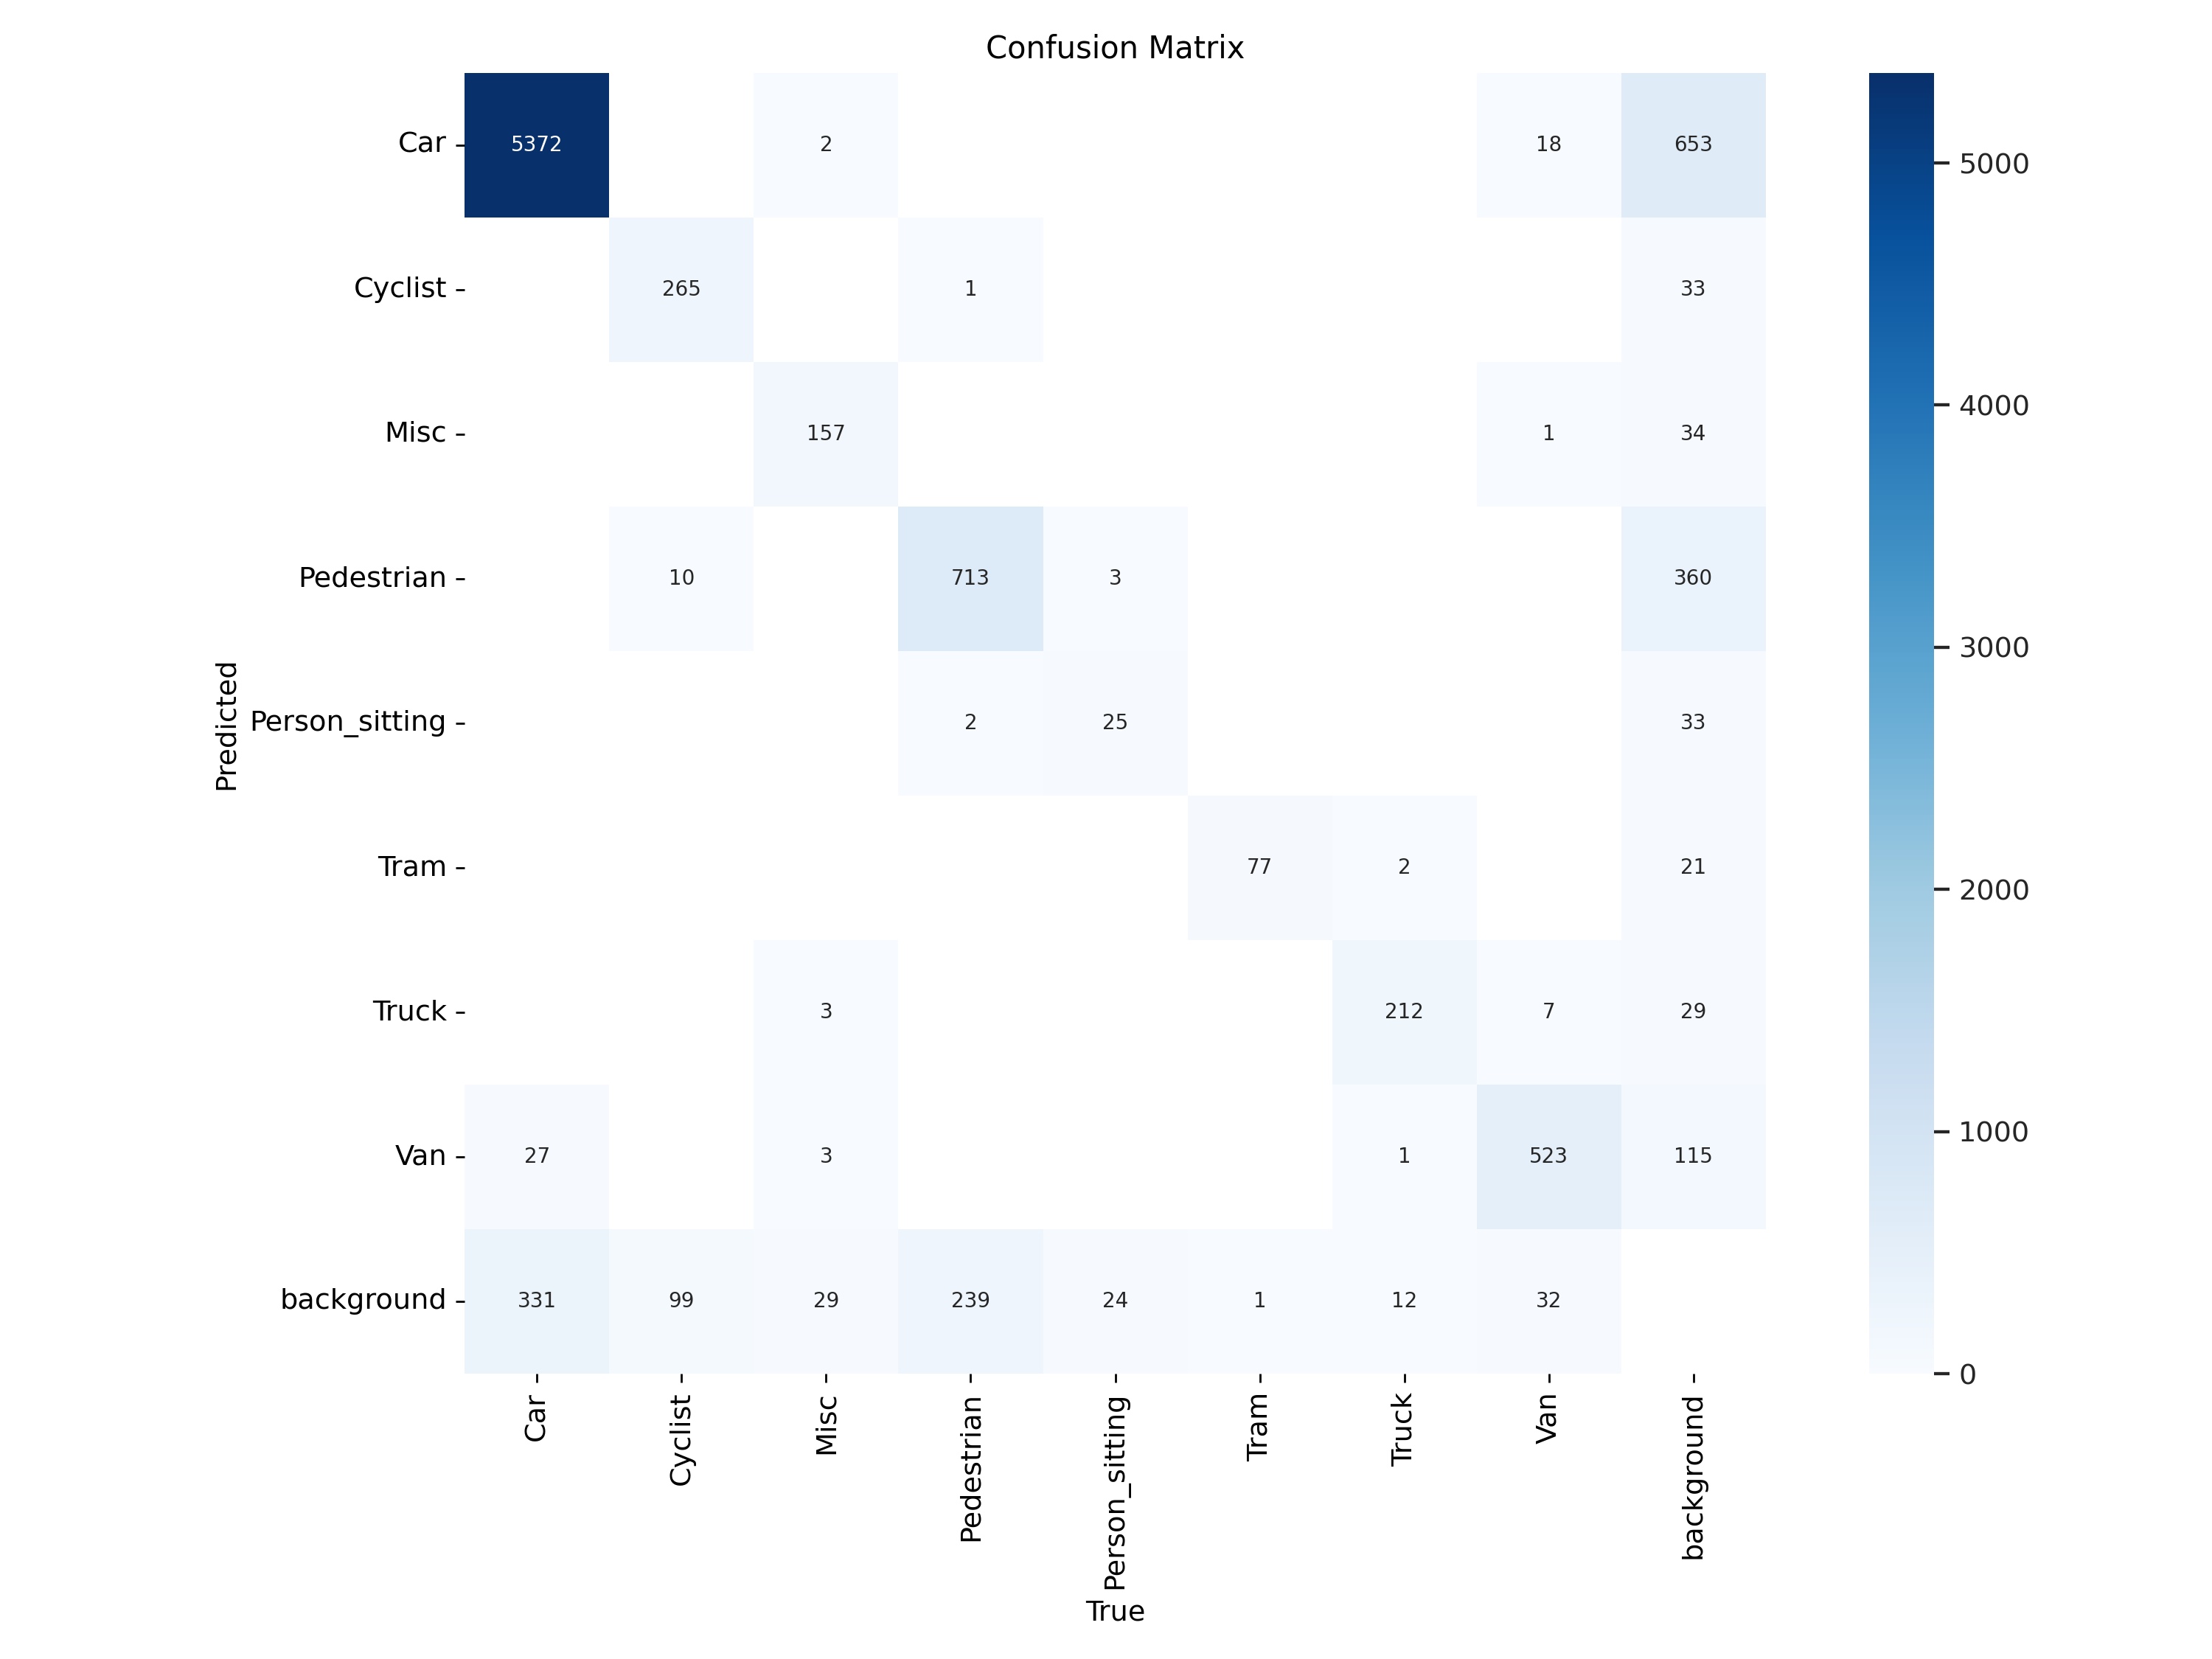

In [9]:
%cd /content/drive/MyDrive/yolov8_augmented
Image(filename=f'runs/detect/train/confusion_matrix.png', width=600)

/content/drive/MyDrive/yolov8_augmented


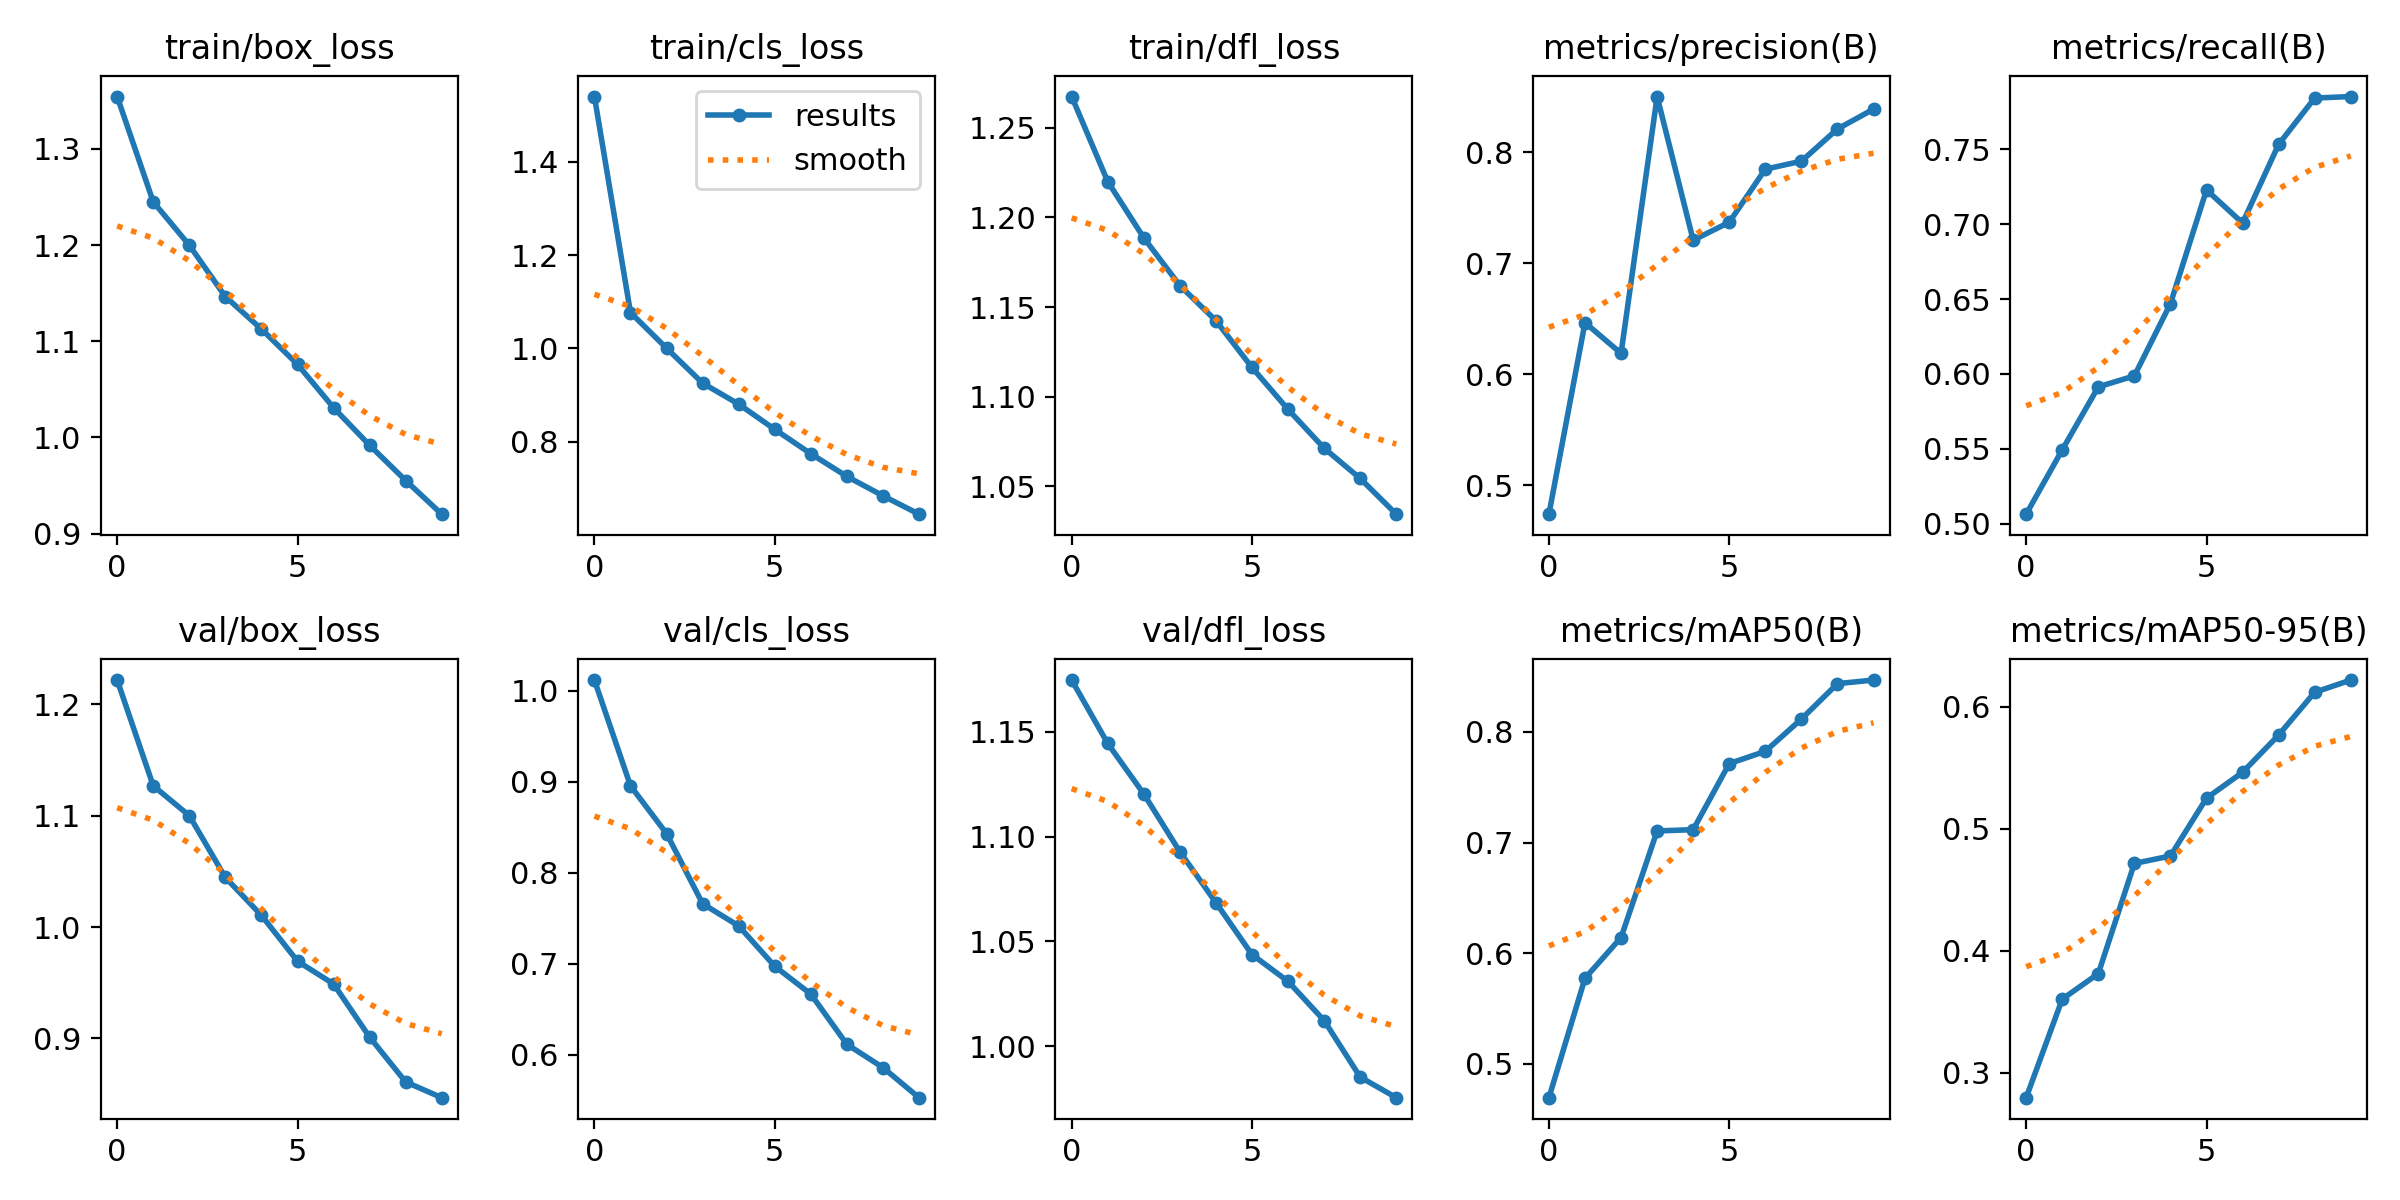

In [10]:
%cd /content/drive/MyDrive/yolov8_augmented
Image(filename=f'runs/detect/train/results.png', width=600)

/content/drive/MyDrive/yolov8_augmented


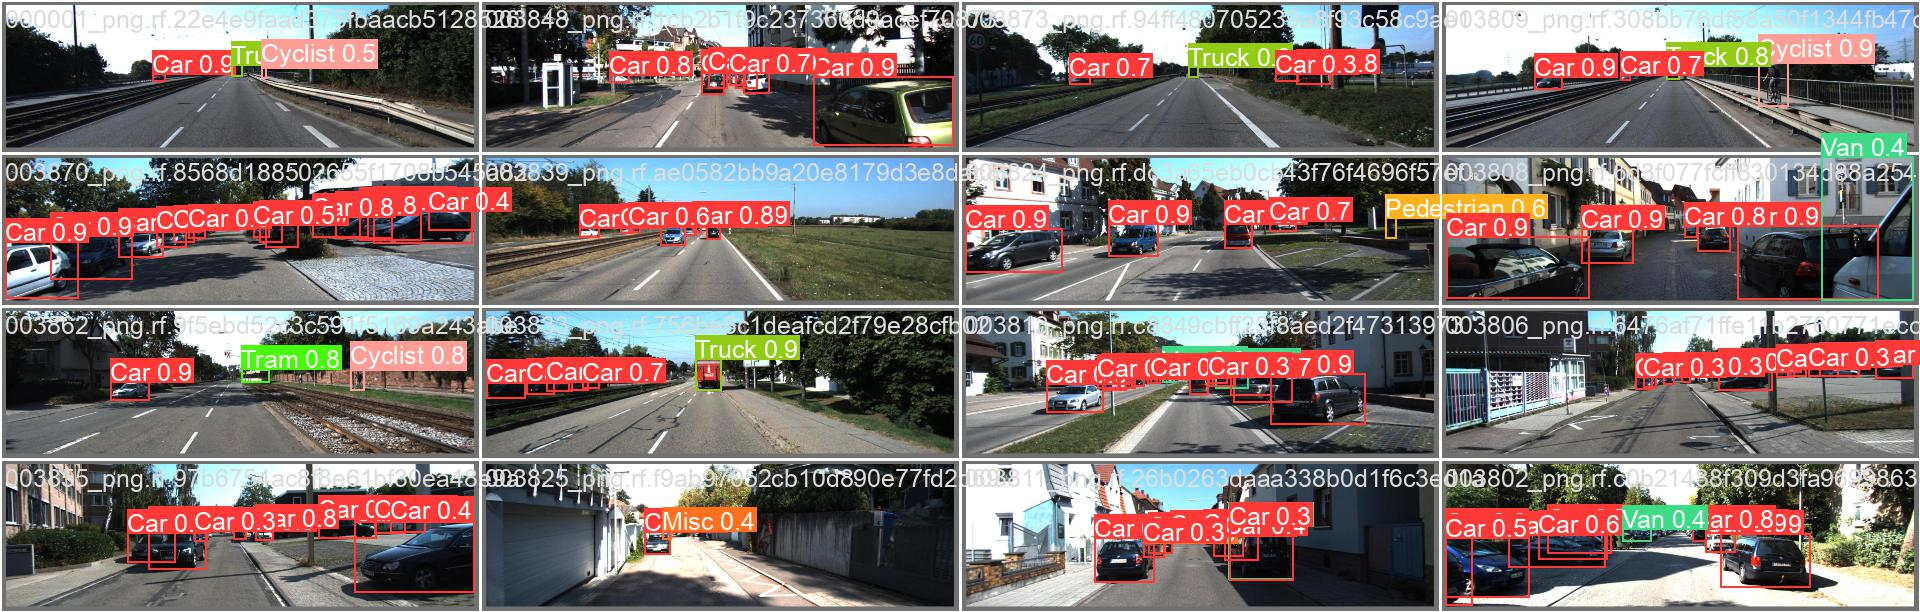

In [11]:
%cd /content/drive/MyDrive/yolov8_augmented
Image(filename=f'runs/detect/train/val_batch0_pred.jpg', width=1000)

Validate the model, change the model path to "runs/detect/train/weights/best.pt" If you lunched the training only once, with 25 epochs.

In [ ]:
%cd /content/drive/MyDrive/yolov8_augmented
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content/drive/.shortcut-targets-by-id/1KDufcSOPeZ90N-qJe2OVAlOKNp7BsZky/yolov88_augmented
Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients
val: Scanning /content/datasets/2D-Object-Detection-tsl-14/valid/labels.cache... 1505 images, 0 backgrounds, 0 corrupt: 100% 1505/1505 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 95/95 [00:35<00:00,  2.68it/s]
                   all       1505       8158      0.898      0.832      0.904       0.69
                   Car       1505       5791      0.927      0.944      0.977      0.819
               Cyclist       1505        333      0.887      0.824      0.885      0.616
                  Misc       1505        187      0.912      0.882      0.936      0.721
            Pedestrian       1505        901      0.903      0.705      0.835      0.501
        Person_sitting       1

## Inference

Evaluate the model on the test set. change the model path to "runs/detect/train/weights/best.pt" If you lunched the training only once, with 25 epochs.

In [12]:
%cd /content/drive/MyDrive/yolov8_augmented
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content/drive/MyDrive/yolov8_augmented
Ultralytics YOLOv8.0.111 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients

image 1/1013 /content/datasets/2D-Object-Detection-tsl-25/test/images/004772_png.rf.2790bc59d937a0f5deb5a8ba5850eb40.jpg: 416x1280 10 Cars, 1 Pedestrian, 129.0ms
image 2/1013 /content/datasets/2D-Object-Detection-tsl-25/test/images/004789_png.rf.72180fe1b65f00398f35edbfd733655e.jpg: 416x1280 5 Cars, 19.2ms
image 3/1013 /content/datasets/2D-Object-Detection-tsl-25/test/images/004846_png.rf.40ed54ce5e72c232f1cd38f7f9b277a8.jpg: 416x1280 4 Cars, 19.2ms
image 4/1013 /content/datasets/2D-Object-Detection-tsl-25/test/images/004854_png.rf.24a21aefc488ca2eb1f9df6c9ae4e695.jpg: 416x1280 1 Pedestrian, 19.2ms
image 5/1013 /content/datasets/2D-Object-Detection-tsl-25/test/images/004863_png.rf.8d7b35d0d3981a35cdb800e1425d8a2e.jpg: 416x1280 3 Cars, 1 Tram, 19.2ms
image 6/1013 /content/datasets/2D-Object-De

Visualize some predictions on the test set.

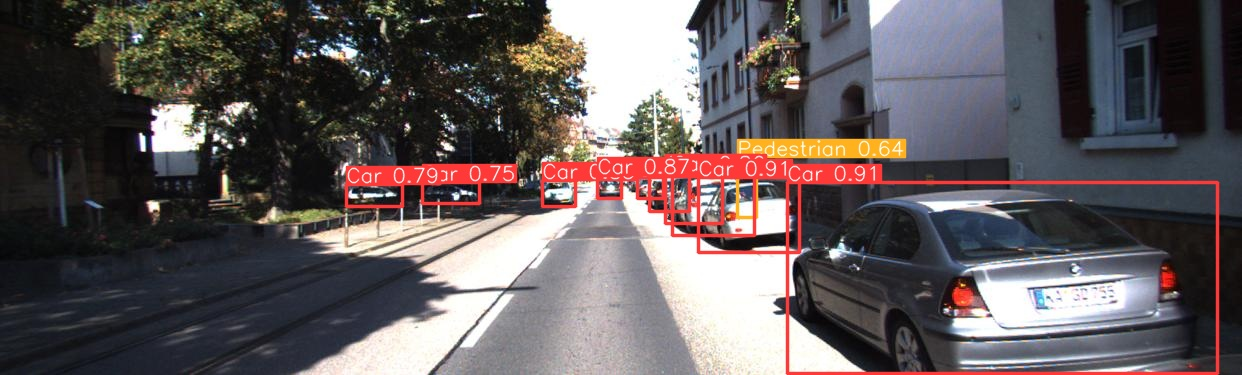

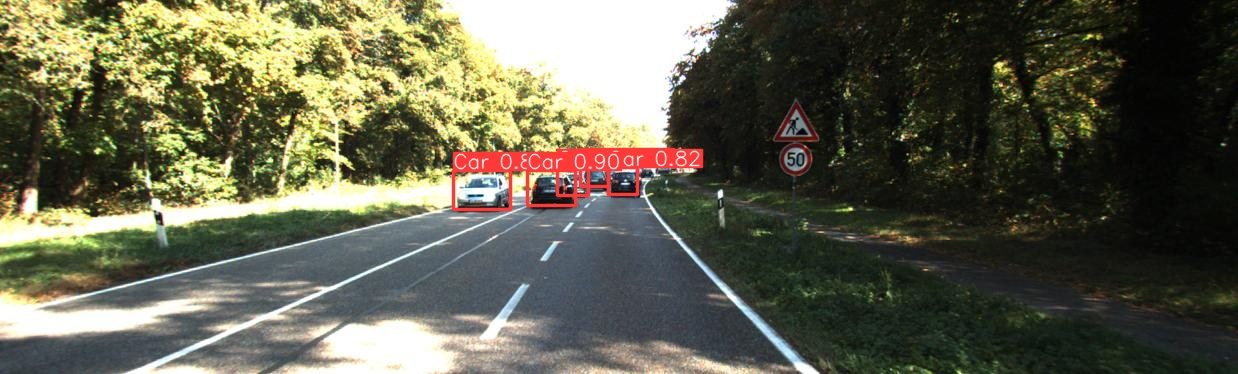

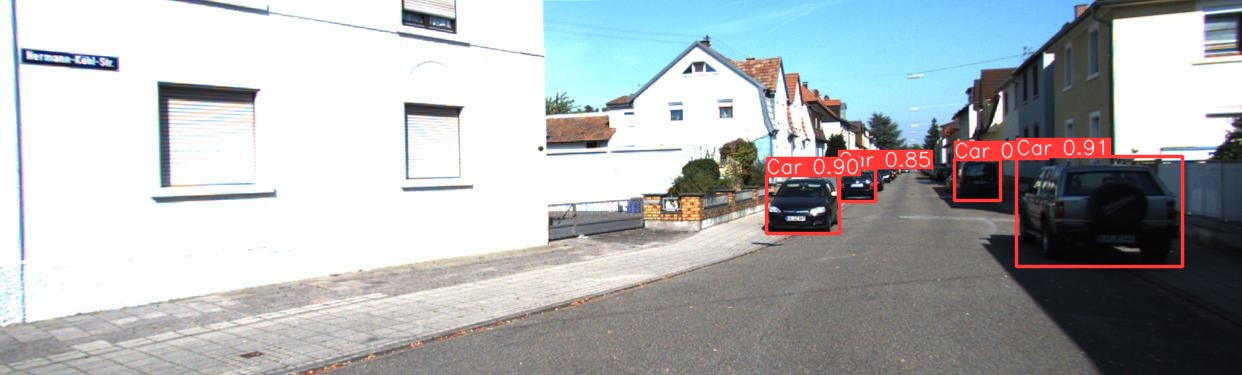

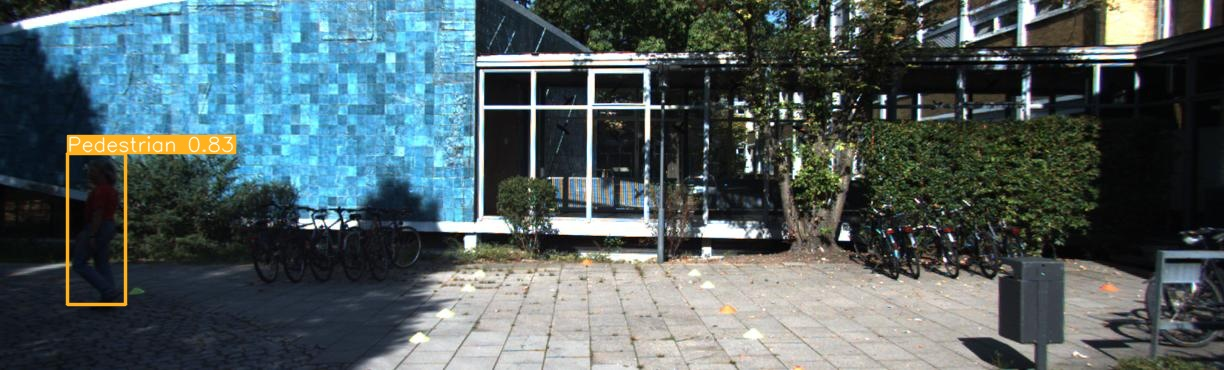

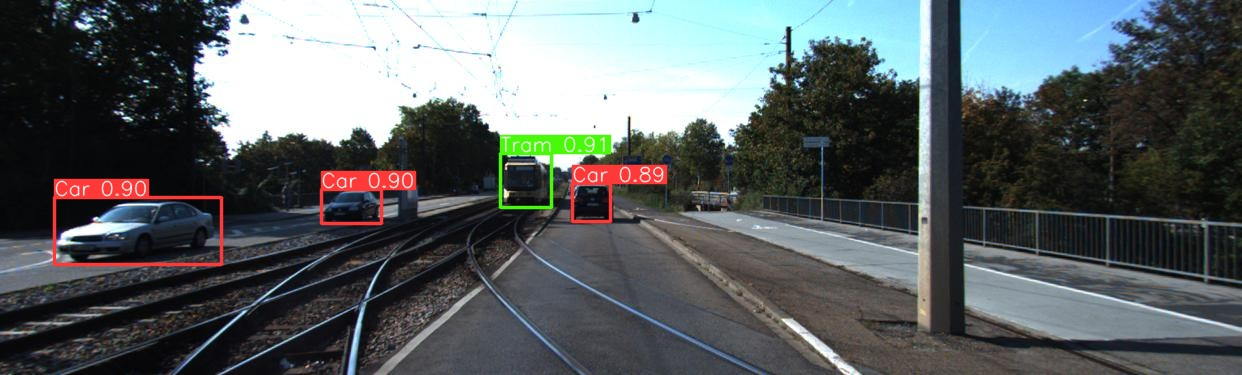

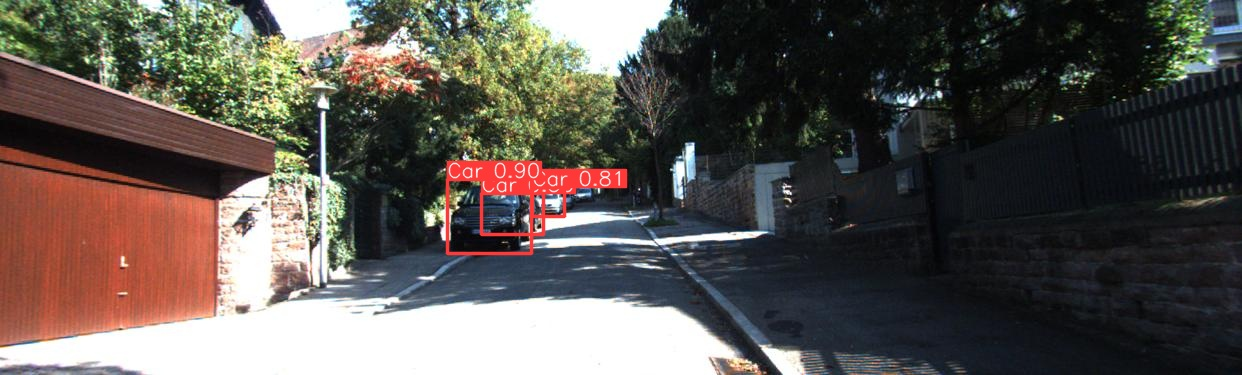

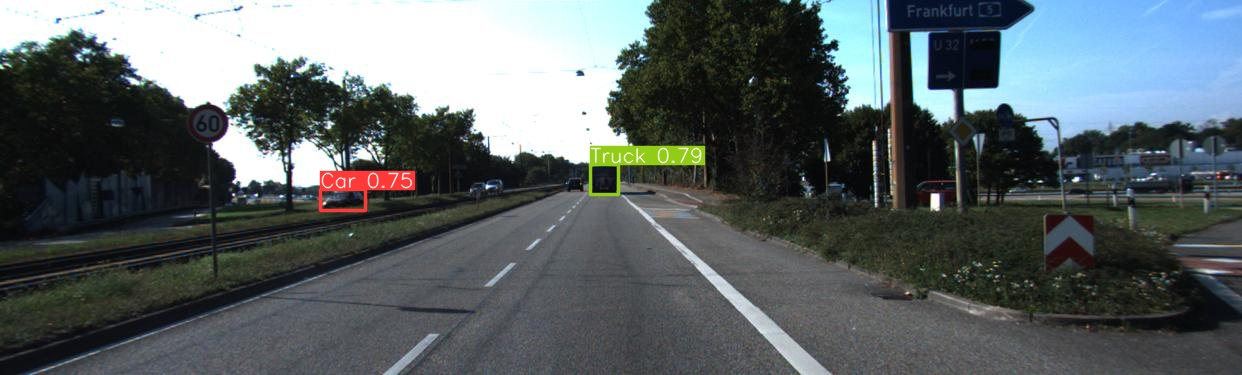

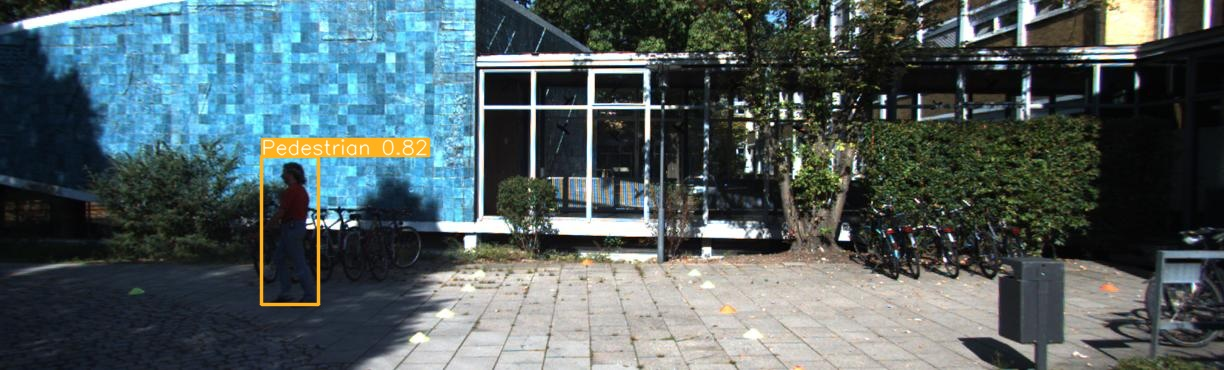

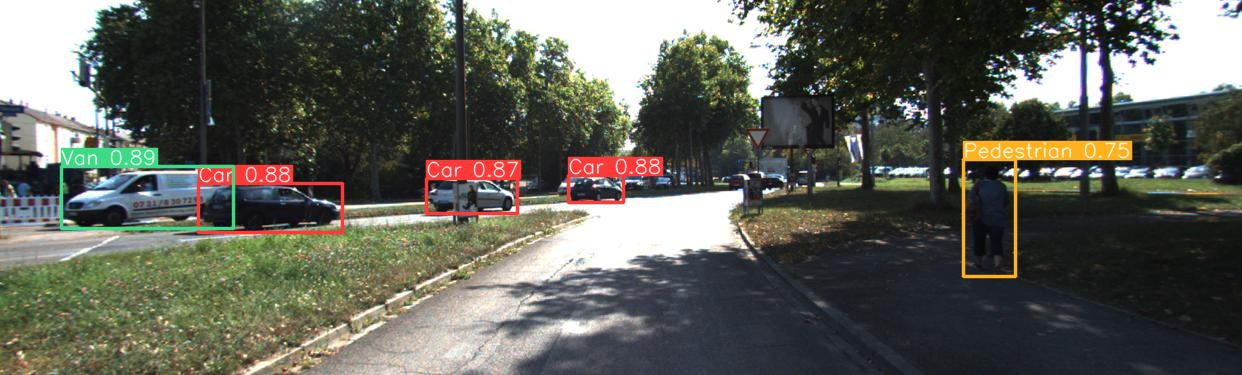

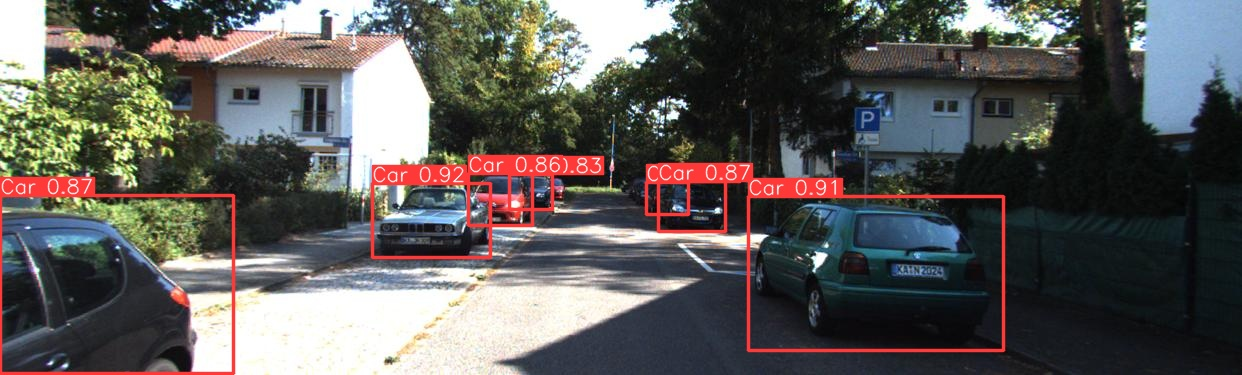

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=1000))
      print("\n")